In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [3]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

## Grid Search

In [6]:
metrics = ["euclidean", "cosine"] #"brute" and "auto" were presenting the exact same results.
#leaf_size = [10, 20, 30, 40, 50] #all leaf sizes were prducing the same results
eps = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples = [100, 200, 300, 400, 500]

In [7]:
def grid_search(logs, labels_, gram, min_df):
     
    X = get_features(logs, gram, min_df)
    X = X.toarray()
    
    idxs = np.where(np.all(X == 0, axis=1))
    
    X = np.delete(X, idxs, axis=0)
    labels_ = np.delete(labels_, idxs)
    
    result_header = ["Metrics", "Eps", "Min Samples", "VMeasure", "Fowlkes-Mallows", "Clusters (No)"]
    results = []
    
    labels = []
    ls = 0
    
    for metric in metrics:
        for ep in eps:
            for min_s in min_samples:
                model = DBSCAN(eps=ep,min_samples=min_s,algorithm="auto",metric=metric)
                model.fit(X)

                labels = model.labels_

            #plt.figure()
            #plt.suptitle("DBSCAN(gram=%d,eps=%d,min_samples=%d,leaf_size=%d,algorithm=%s)" % (gram,ep,min_s,ls,alg), size=14)

                vm = evaluate_vmeasure(labels_, labels)
                fm = evaluate_fm(labels_, labels)

                lst1 = set(labels)

                result = [metric, ep, min_s, vm, fm, len(lst1)-1]
                results.append(result)
                tab_results(result_header, results) 

                
    tab_results(result_header, results)         
            

In [ ]:
grid_search(logs, log_labels, 2, 70)

In [ ]:
grid_search(logs, log_labels, 2, 100)

In [ ]:
grid_search(logs, log_labels, 3, 90)

In [ ]:
grid_search(logs, log_labels, 3, 100)

## Bigram Feature Vectorizer

In [12]:
eval_results = []

In [13]:
labels_ = log_labels

X = get_features(logs, 2, 70)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [14]:
model = DBSCAN(eps=0.4,min_samples=200,algorithm="auto",metric="cosine")
model.fit(X)

DBSCAN(eps=0.4, metric='cosine', min_samples=200)

In [15]:
labels = model.labels_

In [16]:
lst1 = set(labels)
lst1

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

C:\Users\Riley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\umap\spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


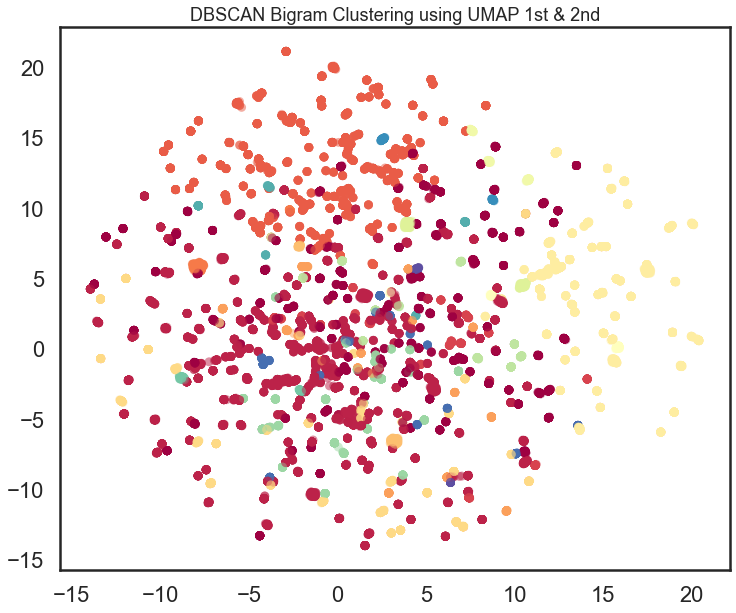

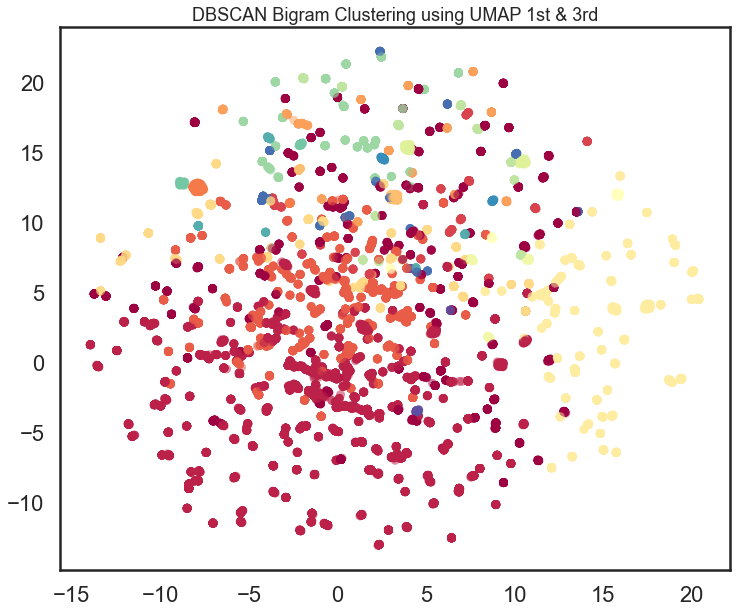

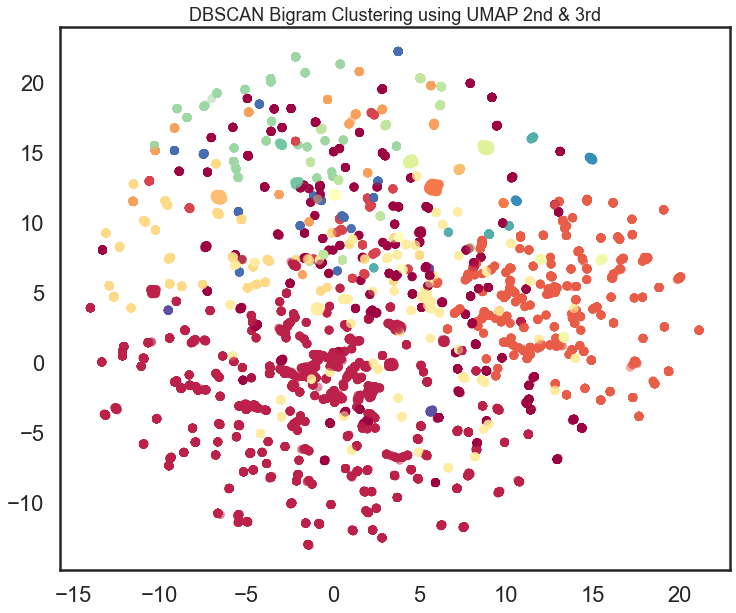

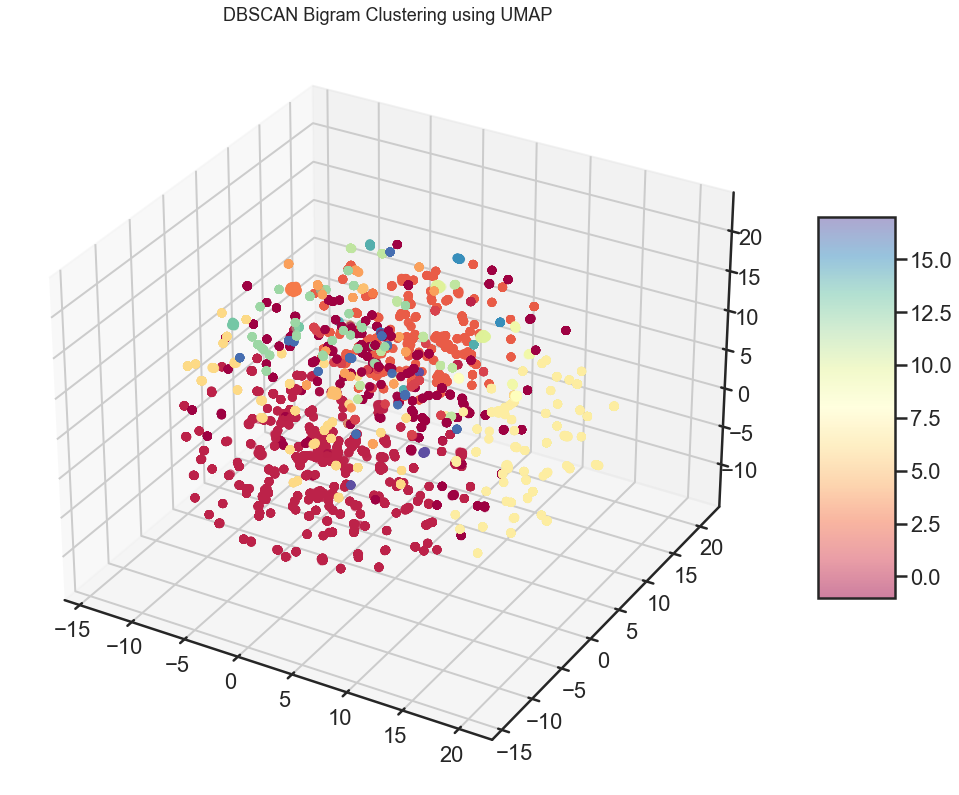

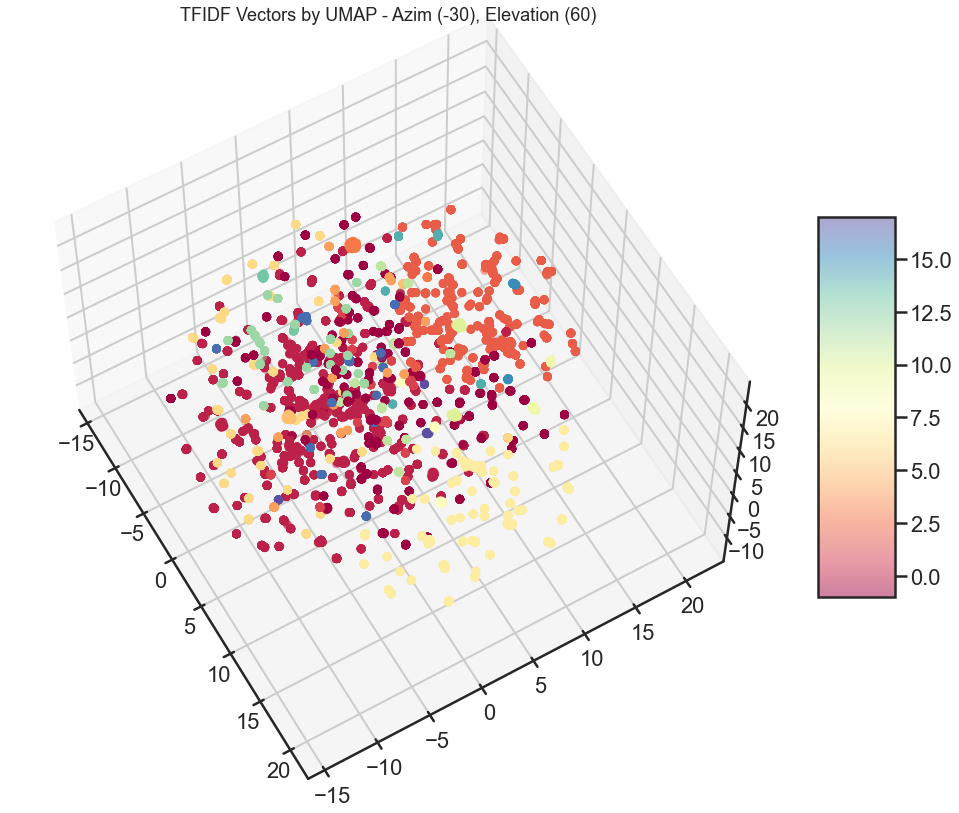

In [17]:
plot_clusters("DBSCAN Bigram Clustering using UMAP", X, labels)

In [18]:
results = evaluate_clustering('DBSCAN Bigram Clustering ', X, labels_, labels)
print(results)

['DBSCAN Bigram Clustering ', '0.69', '0.70', '0.70', '0.42', '0.70', '0.51']


In [19]:
eval_results.append(results)

In [20]:
np.count_nonzero(labels == -1)

3797

## Trigram Feature Vectorizer

In [21]:
labels_ = log_labels

X = get_features(logs, 3, 90)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [22]:
model = DBSCAN(eps=0.5,min_samples=100,algorithm="auto",metric="cosine")
model.fit(X)

DBSCAN(metric='cosine', min_samples=100)

In [23]:
labels = model.labels_

In [24]:
lst1 = set(labels)
lst1

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

C:\Users\Riley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\umap\spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


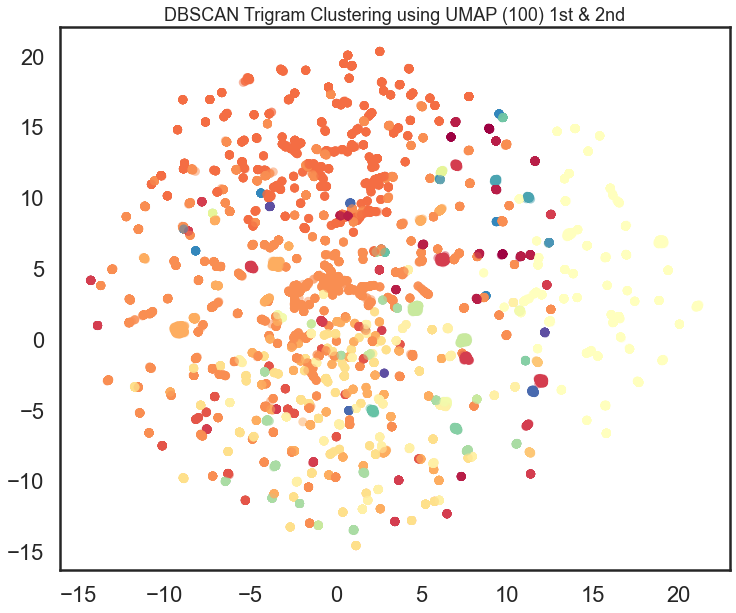

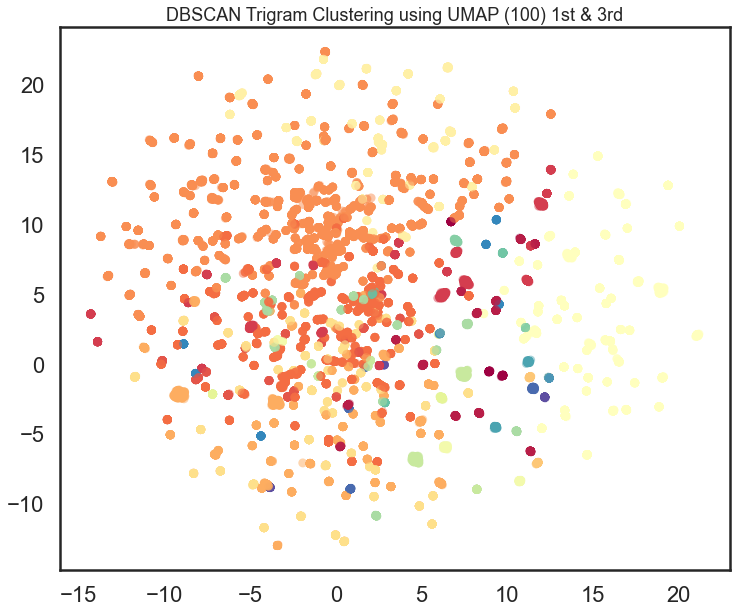

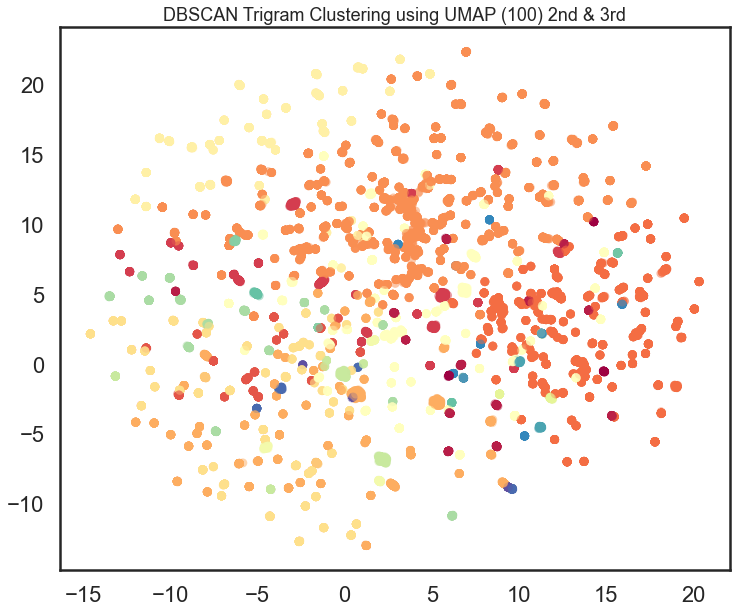

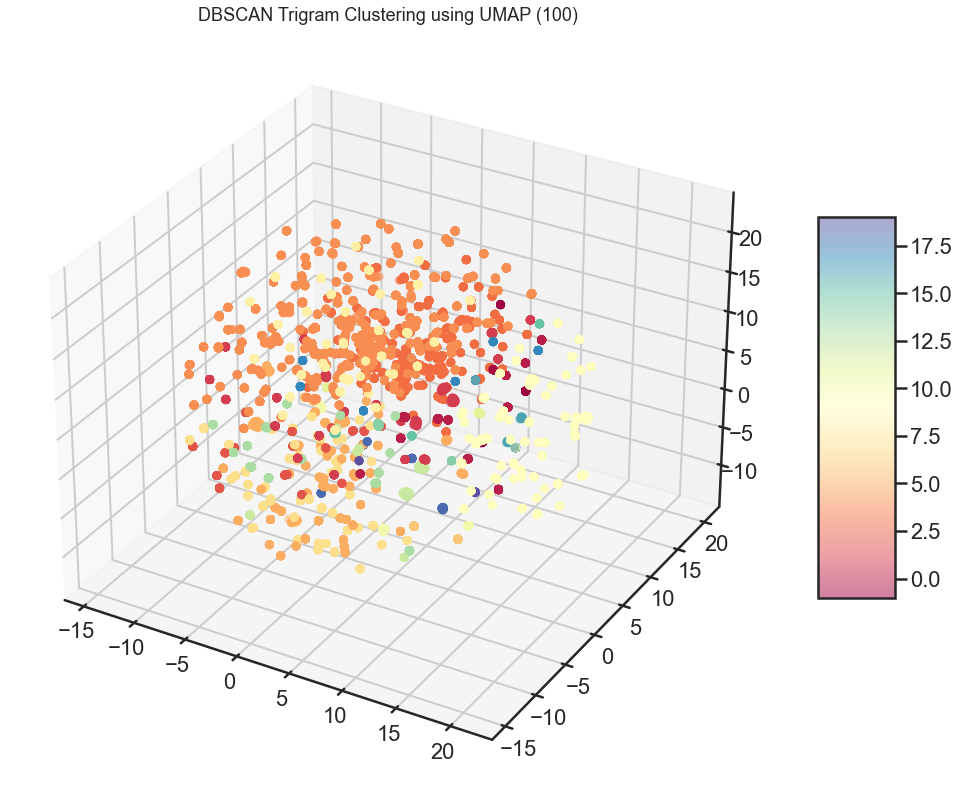

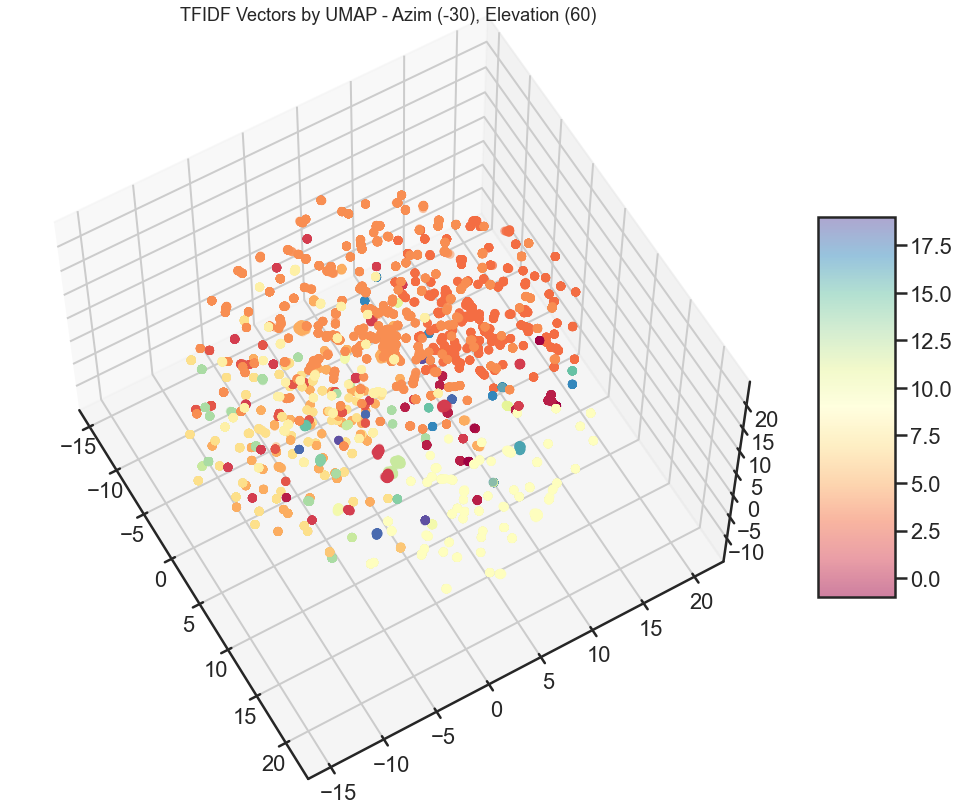

In [25]:
plot_clusters("DBSCAN Trigram Clustering using UMAP (100)", X, labels)

In [26]:
results = evaluate_clustering('DBSCAN Trigram Clustering (100)', X, labels_, labels)
print(results)

['DBSCAN Trigram Clustering (100)', '0.88', '0.82', '0.85', '0.67', '0.85', '0.71']


In [27]:
eval_results.append(results)

In [28]:
tabulate_results(eval_results)

+---------------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
|               Name              | Homogeneity | Completeness | V Measure | Adj Rand Score | Norm Mutual Score | Fowlkes Mallows |
+---------------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
|    DBSCAN Bigram Clustering     |     0.69    |     0.70     |    0.70   |      0.42      |        0.70       |       0.51      |
| DBSCAN Trigram Clustering (100) |     0.88    |     0.82     |    0.85   |      0.67      |        0.85       |       0.71      |
+---------------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
